## ARIMA Model 

Using the Tesla stock price data 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [79]:
df = pd.read_csv('TSLA.CSV')

In [80]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [81]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0
757,2022-05-20,713.989990,721.580017,633.000000,663.900024,48190600,0,0.0


In [82]:
## We would only deal with the closing price for simpler anaysis

df.drop(['Open', 'High', 'Low',	'Volume', 'Dividends', 'Stock Splits'], axis=1, inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [84]:
## Converting the datatype of 'Date' to datetime 

df['Date'] = pd.to_datetime(df['Date'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [86]:
## Making the 'Date' column as the index column for convenience

df = df.set_index('Date')

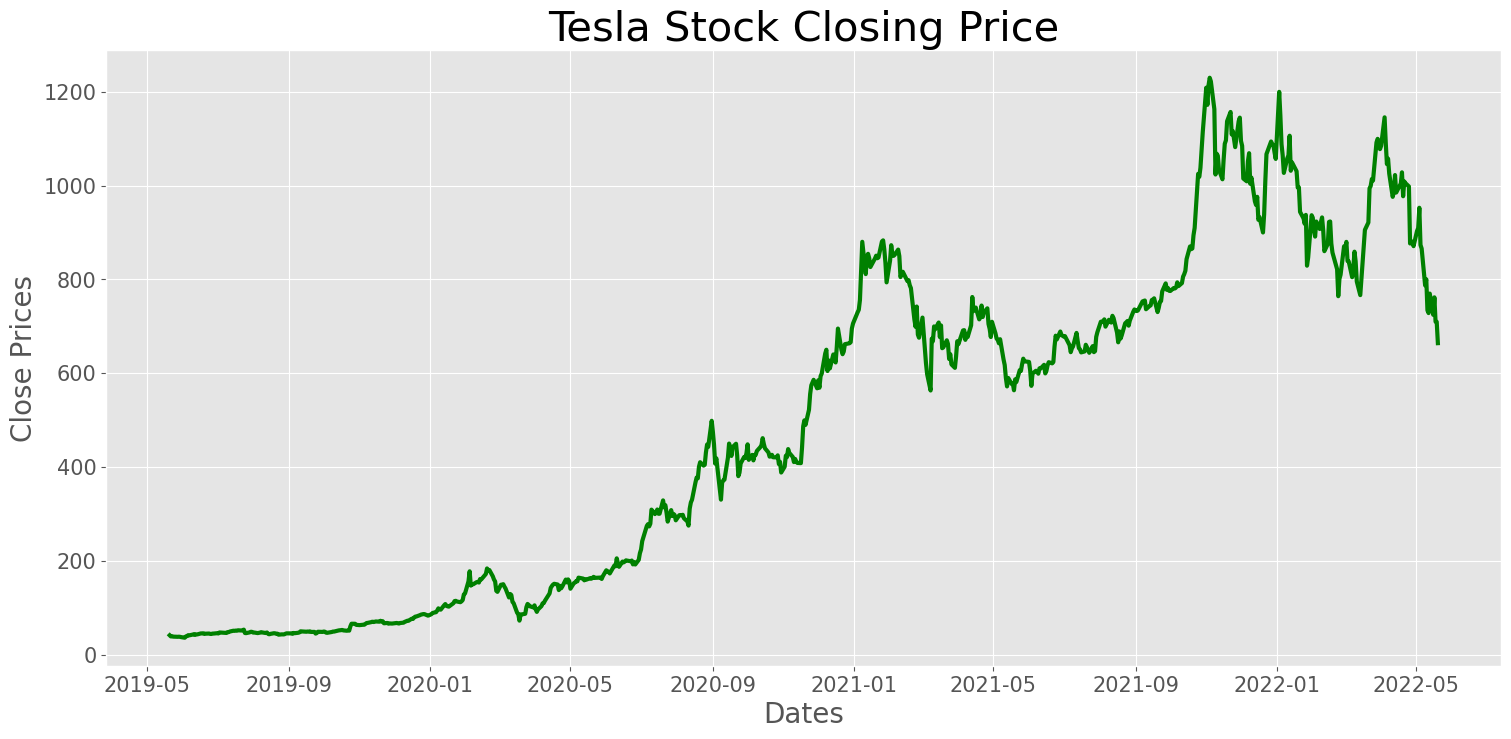

In [87]:
# Plotting close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(df, linewidth = 3, color = 'green')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

We can clearly notice an upward trend in the close price over the time.

## Model Building

Here we would construct an ARIMA model. In ARIMA model we do not need to pass a stationary data converetd from a non-stationary data. The ARIMA model cam itself handle non-stationary data. The model would automatically perform the level of differencing that would be required to make it stationary. So we can pass the original data 'df' into out ARIMA model. 

In [88]:
## Train-Test Split

training_data = df['Close'][0:-60]  
test_data = df['Close'][-60:]

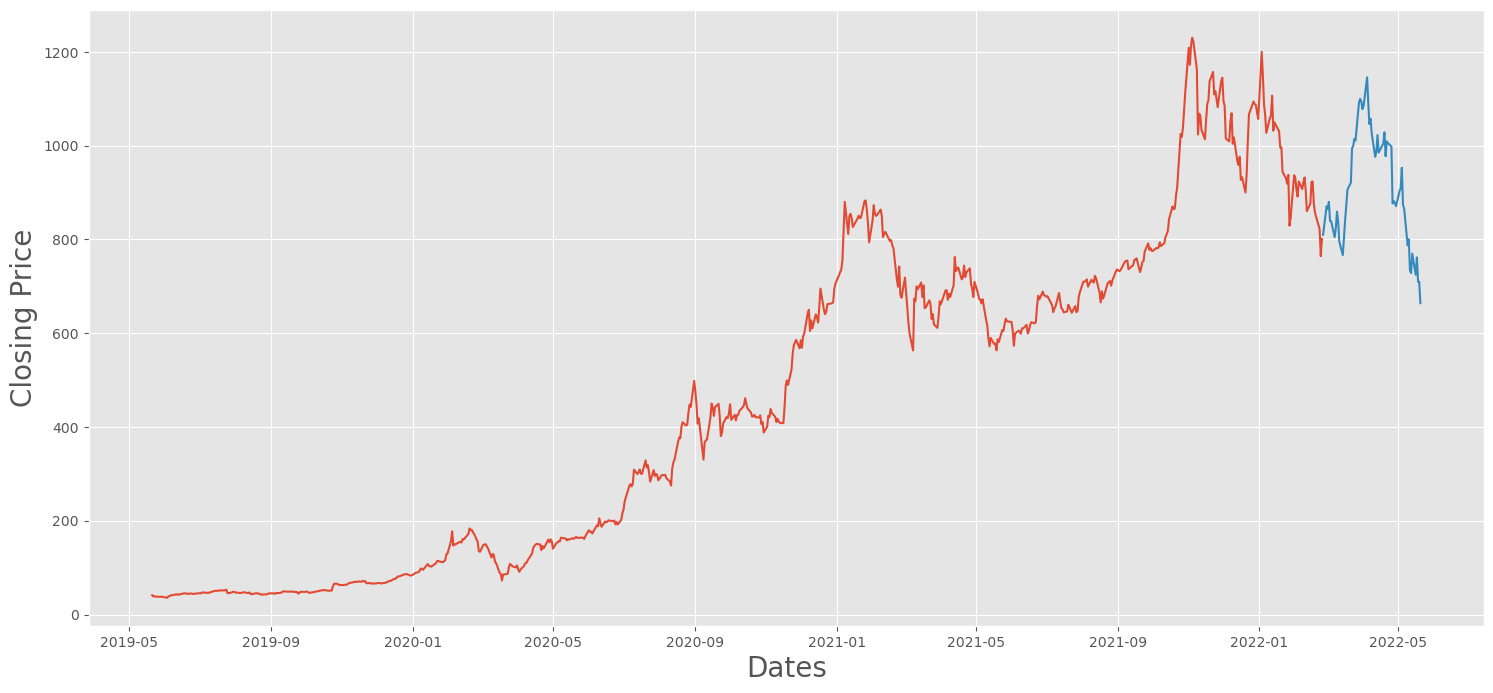

In [89]:
## Plotting the training and test data

plt.figure(figsize=(18,8))
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Price', fontsize=20)
plt.plot(training_data)
plt.plot(test_data)

All the red data points are training data and all the blue data points are test data. 

In [90]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [93]:
## Historical data
history = [i for i in training_data]

In [94]:
history[0:10]

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125]

#### Selecting the best model, that is, the order(p,d,q) of the ARIMA model with the least Mean Squared error

In [96]:
## Considering a particular range of p, d, q
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

In [97]:
## Displaying all the possible orders with the given range of p, d, and q

order = []

for i in p_values:
    for j in d_values:
        for k in q_values:
            a = (i,j,k)
            order.append(a)
            
order

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [98]:
import warnings  
warnings.filterwarnings('ignore')  ## To ignore warnings 

mse_list = []

for i in order:
    
    history = [x for x in training_data]
    predictions = []
    
    for j in range(len(test_data)):
        model = ARIMA(history, order=i)
        model_training = model.fit()
        forecast = model_training.forecast(alpha=0.05)
        predictions.append(forecast)
        history.append(test_data[j])
   
    mse = mean_squared_error(predictions,test_data)
    mse_list.append(mse)
    print('ARIMA', i, ':', 'MSE', '-', mse)
    

min_mse = min(mse_list)
min_mse_index = mse_list.index(min_mse)
min_mse_order_index = order[min_mse_index]

print('Below is the order with the corresponding mean_squared_error(MSE) which is the minumum MSE.')
print('ARIMA', min_mse_order_index, ':', 'MSE', '-', min_mse)

ARIMA (0, 0, 0) : MSE - 209227.94812163975
ARIMA (0, 0, 1) : MSE - 58159.81579676215
ARIMA (0, 0, 2) : MSE - 28085.113783688
ARIMA (0, 1, 0) : MSE - 1561.545671330393
ARIMA (0, 1, 1) : MSE - 1558.86774475119
ARIMA (0, 1, 2) : MSE - 1569.5004014091658
ARIMA (0, 2, 0) : MSE - 3344.849166703504
ARIMA (0, 2, 1) : MSE - 1569.0605884725994
ARIMA (0, 2, 2) : MSE - 1566.538685508544
ARIMA (1, 0, 0) : MSE - 1558.3992200403095
ARIMA (1, 0, 1) : MSE - 1556.2535923591724
ARIMA (1, 0, 2) : MSE - 1566.8823465241608
ARIMA (1, 1, 0) : MSE - 1558.2991728958102
ARIMA (1, 1, 1) : MSE - 1564.5678187492658
ARIMA (1, 1, 2) : MSE - 1594.7698221570026
ARIMA (1, 2, 0) : MSE - 2133.0048052955676
ARIMA (1, 2, 1) : MSE - 1566.026242622186
ARIMA (1, 2, 2) : MSE - 1578.5387415257862
ARIMA (2, 0, 0) : MSE - 1555.5080342881627
ARIMA (2, 0, 1) : MSE - 1559.7748095653105
ARIMA (2, 0, 2) : MSE - 1567.943045538566
ARIMA (2, 1, 0) : MSE - 1570.912737133242
ARIMA (2, 1, 1) : MSE - 1580.7899882304498
ARIMA (2, 1, 2) : MSE -

So the best order for our ARIMA model is (2,0,0).

In [100]:
## Building our final model ARIMA(2,0,0)

history = [x for x in training_data]
predictions = []

for i in range(len(test_data)):
    model = ARIMA(history, order=(2,0,0))
    model_training = model.fit()
    forecast = model_training.forecast(alpha=0.05)
    predictions.append(forecast)
    history.append(test_data[i])

print(predictions)

mse = mean_squared_error(predictions,test_data)
print('The Mean Squared Error or MSE between the forcasted values and the original test values is', mse)

[array([799.14261837]), array([808.97929651]), array([868.26360628]), array([863.81022079]), array([878.78577321]), array([839.68200138]), array([837.6330699]), array([804.81080525]), array([823.17086485]), array([857.363033]), array([838.1984551]), array([795.799373]), array([766.3876417]), array([800.35671771]), array([838.73442083]), array([870.33055805]), array([904.15551277]), array([920.20586849]), array([992.45736903]), array([998.2717332]), array([1013.0300798]), array([1009.8950361]), array([1090.29623004]), array([1098.7386982]), array([1093.25882832]), array([1076.94296881]), array([1083.76536681]), array([1144.29443946]), array([1091.49333004]), array([1045.39384828]), array([1056.42652471]), array([1025.03146763]), array([975.35779091]), array([986.07514994]), array([1021.29735509]), array([984.59660155]), array([1003.26978212]), array([1027.07065924]), array([977.01402962]), array([1007.35781537]), array([1004.33987804]), array([997.28098863]), array([877.58536009]), arra

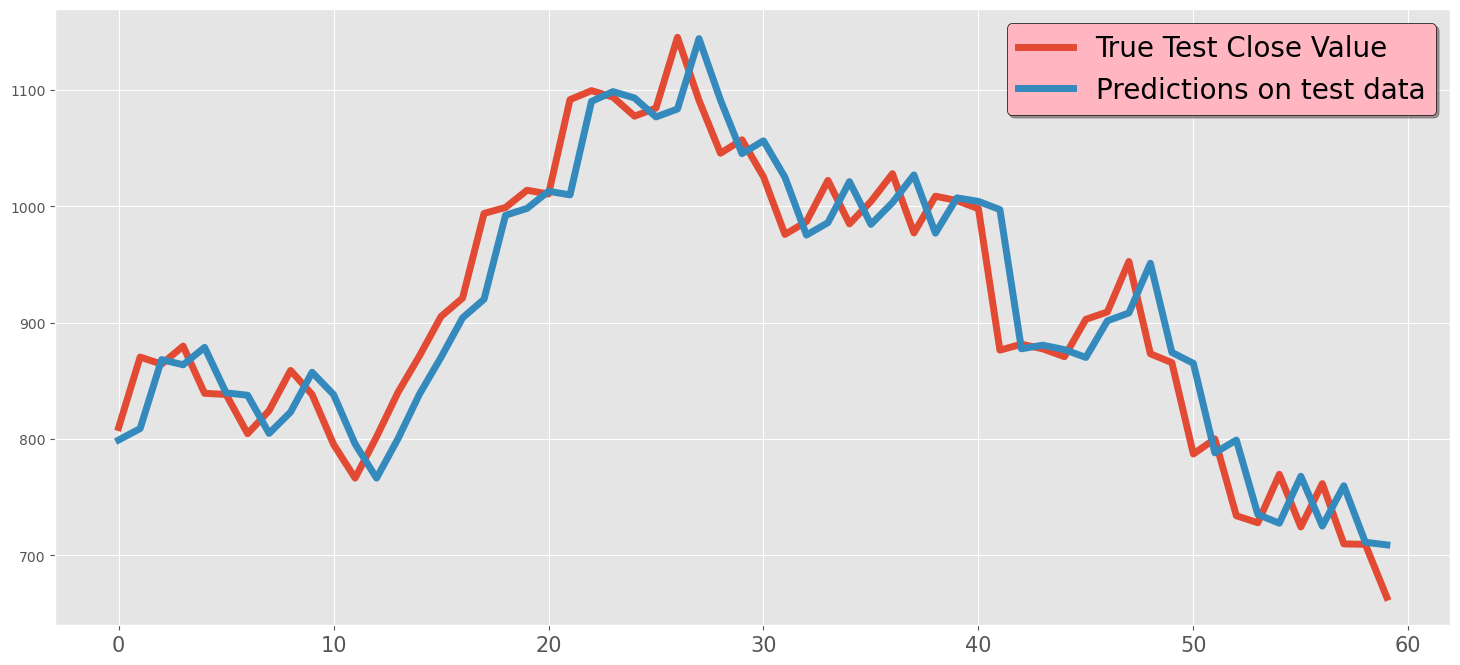

In [101]:
## Plotting the actual test values and the forecasted values

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

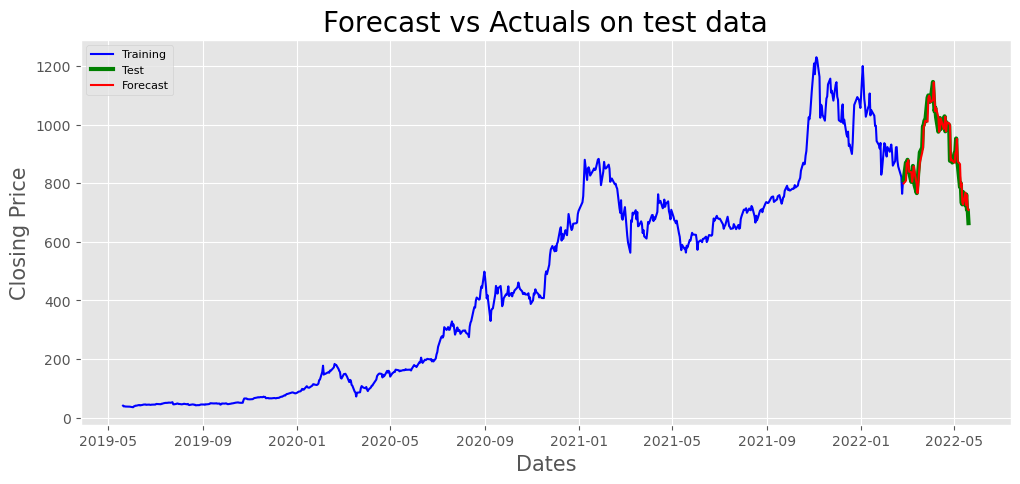

In [102]:
## Plotting the training data, test data, and the forcasted values

predictions_series = pd.Series(predictions, index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Closing Price', fontsize=15)
plt.plot(training_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(predictions_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data', fontsize=20)
plt.legend(loc='upper left', fontsize=8)
plt.show()

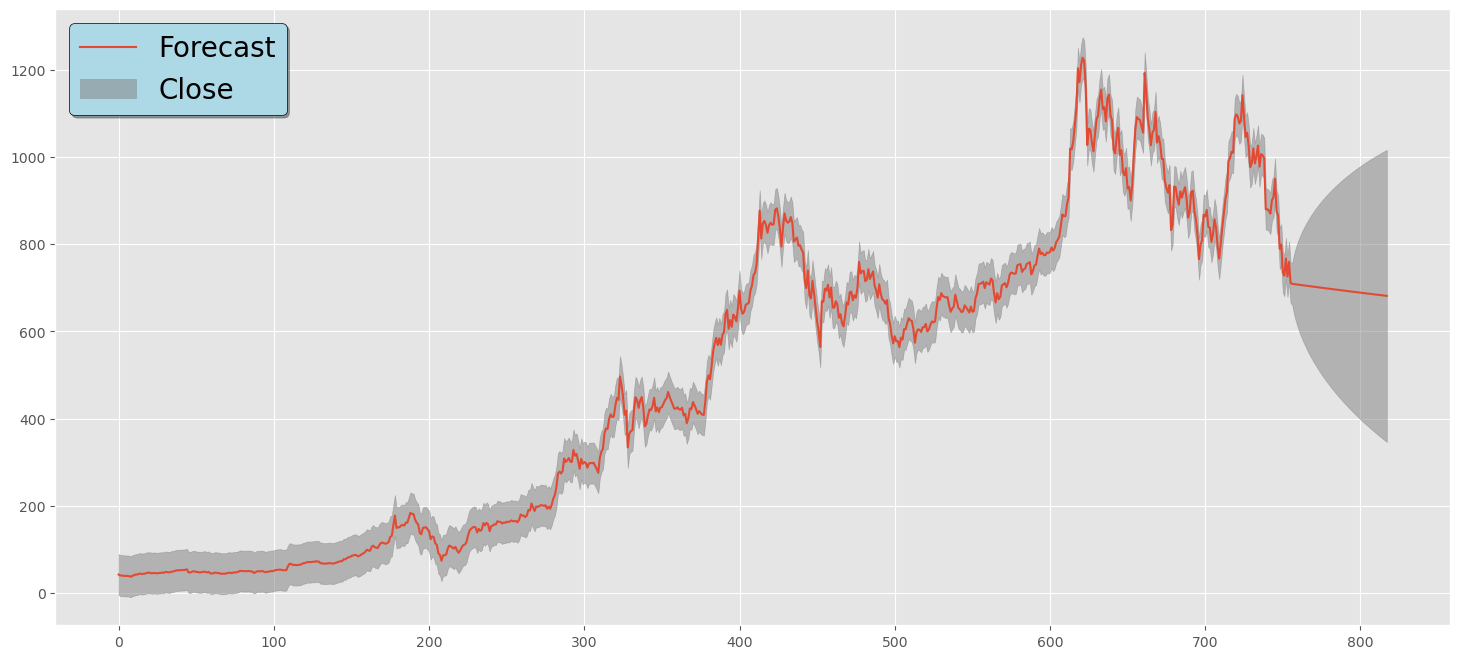

In [103]:
## Forecasting the next 60 values that would come after the test data

from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_training,start=1, end=len(df)+60, ax=ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()